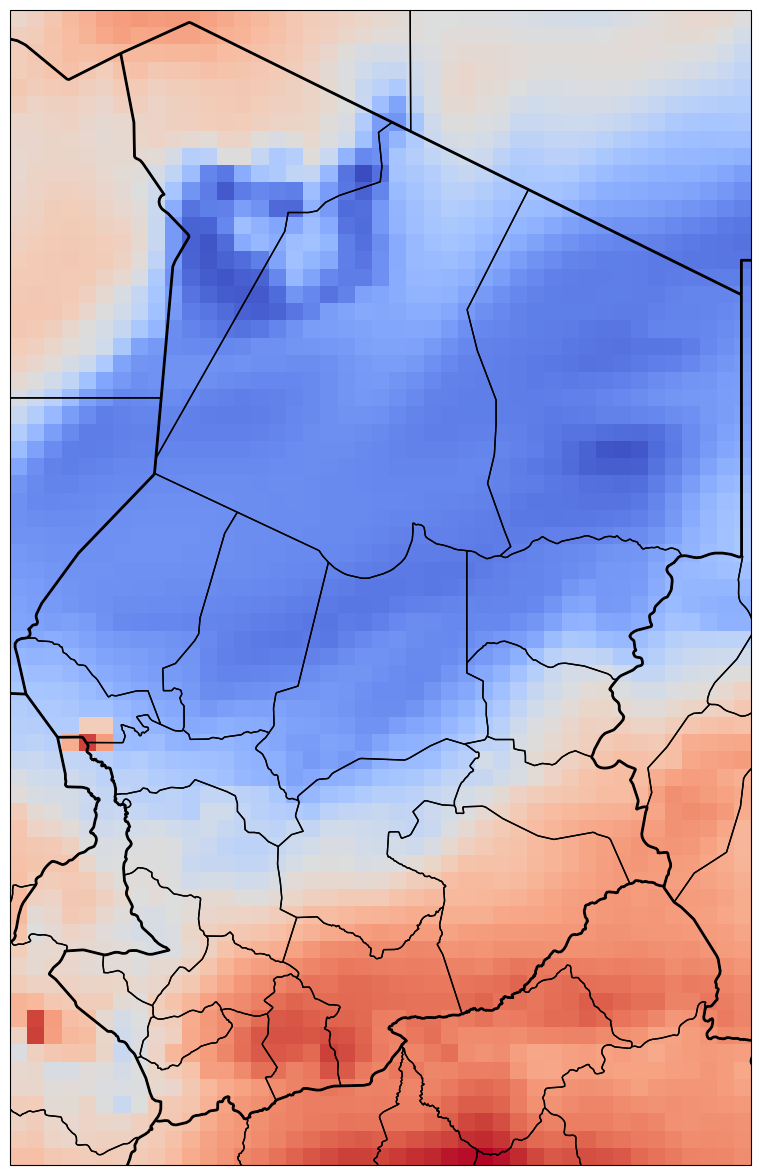

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open the NetCDF file
data = xr.open_dataset('../../data.nc')

# Select a variable and time for visualization
temperature = data['d2m'].sel(time='2000-01-15T12:00:00')

# Create a plot with Cartopy's map projection
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data with a specific colormap, and disable the color bar
temperature.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=False)

# Add coastlines, borders, and other features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2)
ax.add_feature(cfeature.STATES, linestyle='-', linewidth=1)

ax.set_title('')  # Remove the title if present
ax.set_xlabel('')  # Remove x-axis label if present
ax.set_ylabel('')  # Remove y-axis label if present

# Show the plot
plt.savefig('../data/d2m-2000-01-15T12:00:00.png')
plt.show()


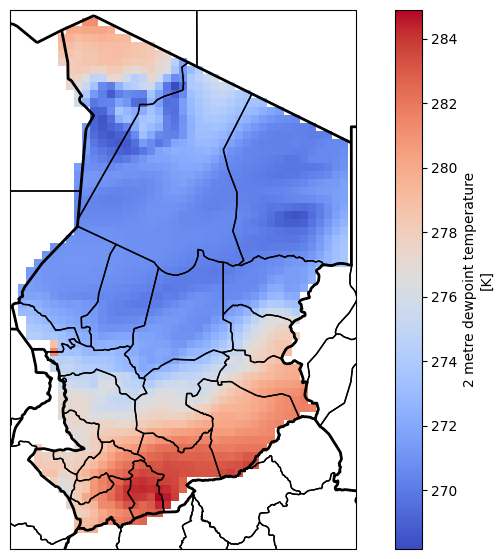

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Load the shapefile for countries
chad_gdf = gpd.read_file('../data/geodata/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')  # Update this path
chad_polygon = chad_gdf[chad_gdf['ADMIN'] == 'Chad'].geometry.values[0]

# Open the NetCDF file
data = xr.open_dataset('../../data.nc')

# Select a variable and time for visualization
temperature = data['d2m'].sel(time='2000-01-15T12:00:00')

# Create a plot with Cartopy's map projection
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Create a mask for the temperature data
mask = np.zeros(temperature.shape, dtype=bool)
# Check which points are inside the polygon
for i in range(temperature.shape[0]):  # Loop over latitude
    for j in range(temperature.shape[1]):  # Loop over longitude
        point = Point(temperature.longitude.values[j], temperature.latitude.values[i])
        if point.within(chad_polygon):
            mask[i, j] = True

# Apply the mask to the temperature data
temperature_masked = temperature.where(mask)

# Add coastlines and borders
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2)
ax.add_feature(cfeature.STATES, linestyle='-', linewidth=1)



# Plot the masked temperature data
temperature_masked.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=True)

# Add title and labels
ax.set_title('')  # Remove the title if present
ax.set_xlabel('')  # Remove x-axis label if present
ax.set_ylabel('')  # Remove y-axis label if present

# Show the plot
plt.show()